In [1]:
import numpy as np
import matplotlib
matplotlib.use('pdf')
import matplotlib.pyplot as plt
import planetRad as pr
%matplotlib inline

In [5]:
font = {'family' : 'serif',
        'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

In [6]:
# Rock abundance data:
ra = np.genfromtxt('/Users/phayne/research/moon/Diviner/regthick/global/ra10ppd.txt')
#x = np.linspace(-180.0,180.0,np.shape(ra)[1])
#y = np.linspace(-70.0,70.0,np.shape(ra)[0])
#lon, lat = np.meshgrid(x,y)

# Thermal inertia (I_273) data:
ti = np.genfromtxt('/Users/phayne/research/moon/Diviner/regthick/global/ti10ppd.txt')

# Longitude and latitude grids:
lon = np.genfromtxt('/Users/phayne/research/moon/Diviner/regthick/global/lon10ppd.txt')
lat = np.genfromtxt('/Users/phayne/research/moon/Diviner/regthick/global/lat10ppd.txt')

/Users/phayne/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask = (resdat <= 0)
/Users/phayne/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


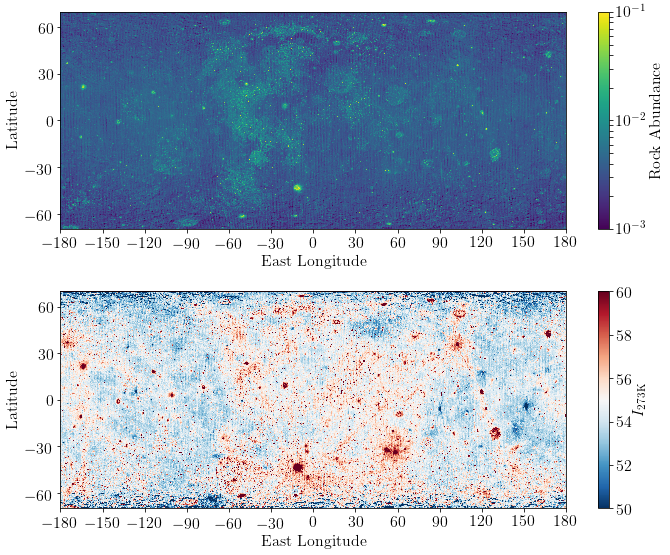

In [14]:
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.pcolormesh(lon, lat, ra, cmap='viridis', norm=matplotlib.colors.LogNorm(vmin=1e-3, vmax=1e-1))
plt.ylim([-70,70])
plt.yticks([-60,-30,0,30,60])
plt.xticks(np.arange(-180,181,30))
plt.xlabel('East Longitude')
plt.ylabel('Latitude')
cb_ra = plt.colorbar(label='Rock Abundance')
plt.subplot(212)
plt.pcolormesh(lon, lat, ti, cmap='RdBu_r', vmin=50, vmax=60 )
plt.ylim([-70,70])
plt.yticks([-60,-30,0,30,60])
plt.xticks(np.arange(-180,181,30))
plt.xlabel('East Longitude')
plt.ylabel('Latitude')
cb_ti = plt.colorbar(label='$I_{273\mathrm{K}}$')
plt.tight_layout()
#plt.show()
plt.savefig('figures/ra_ti_subplots.png', dpi=300, bbox_inches='tight')

/Users/phayne/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in greater_equal


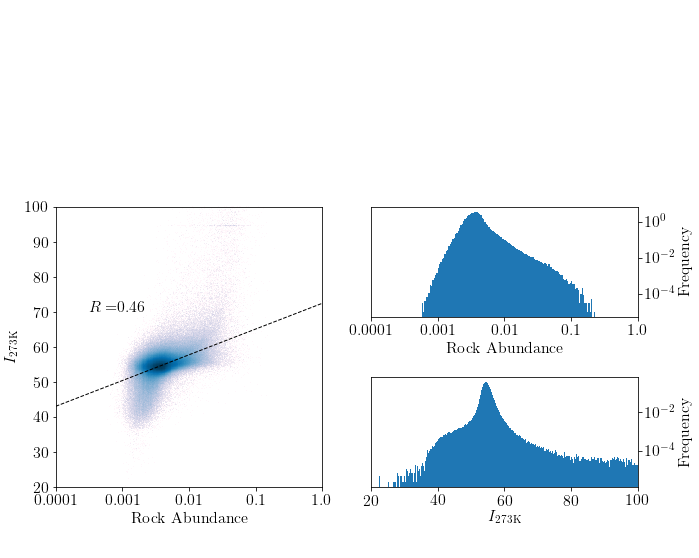

In [11]:
# Number of bins in histograms
n_ra = 200
n_ti = 1000

# Range of histograms
range_ra = [-4,0]
range_ti = [20,100]

# Restrict variables to valid range
mask = ( (ti<=200) & (ti>=0) & (ra>=0) & np.isfinite(ti) & np.isfinite(np.log10(ra)) );
x, y = np.log10(ra[mask]), ti[mask]

# Correlation coefficient: R.A. vs T.I.
r = np.corrcoef(x.flatten(),y.flatten())[0,1]

# 2-d histogram
from matplotlib.colors import LogNorm
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist2d(x.flatten(), y.flatten(), bins=(n_ra, n_ti), norm=LogNorm(), cmap='PuBu')
pfit = np.polyfit(x.flatten(), y.flatten(), 1)
xx = np.linspace(-4,0,20)
plt.plot(xx, np.polyval(pfit, xx),'--k', linewidth=1)
plt.ylim(range_ti)
plt.xlim(range_ra)
plt.xlabel('Rock Abundance')
plt.ylabel('$I_\mathrm{273K}$')
plt.xticks(np.arange(-4,0.01,1), (10**np.arange(-4,0.01,1, dtype=float)).astype(str))
plt.text(-3.5,70, r'$R = ${:.2f}'.format(r))

# Rock abundance histogram
h1 = plt.subplot(222)
plt.hist(x.flatten(), range=range_ra, bins=n_ra, normed=True)
plt.xlim(range_ra)
plt.xlabel('Rock Abundance')
plt.xticks(np.arange(-4,0.01,1), (10**np.arange(-4,0.01,1, dtype=float)).astype(str))
plt.ylabel('Frequency')
h1.yaxis.tick_right()
h1.yaxis.set_label_position('right')
plt.yscale('log')

# Thermal inertia histogram
h2 = plt.subplot(224)
plt.hist(y.flatten(), range=range_ti, bins=n_ti, normed=True)
plt.xlim(range_ti)
plt.xlabel('$I_\mathrm{273K}$')
plt.ylabel('Frequency')
h2.yaxis.tick_right()
h2.yaxis.set_label_position('right')
plt.yscale('log')

plt.tight_layout()

plt.show()